In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
charity_df = pd.read_csv('Resources/charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Preprocessing
### Combine rare categorical values via bucketing

In [2]:
# Check data types in DataFrame
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [3]:
# Generate our categorical variable list
category_columns = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
charity_df[category_columns].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [4]:
# EIN column functions like an index, since each number appears only once
charity_df.EIN.value_counts()

471361061    1
716145914    1
470850777    1
742622426    1
436124893    1
            ..
205040320    1
461149136    1
474460867    1
204833477    1
352260098    1
Name: EIN, Length: 34299, dtype: int64

In [5]:
# Drop 'EIN' column
charity_df = charity_df.drop('EIN', axis=1)

In [6]:
# Print out NAME value counts to assess the need for binning
names = charity_df.NAME.value_counts()
names[names < 10]

VICTORY NEW TESTAMENT FELLOWSHIP INTERNATIONAL          9
RECREATION CENTERS OF SUN CITY INC                      9
PTA FLORIDA CONGRESS                                    9
UNITED OSTOMY ASSOCIATIONS OF AMERICA INC               9
OREGON EDUCATION ASSOCIATION                            9
                                                       ..
HEALING THE HEROES FOUNDATION                           1
ROUGHNECK FOUNDATION                                    1
INSIGHT SEMINARS INC                                    1
EDUCATIONAL SERVICES HAWAII FOUNDATION                  1
SEATTLE SINGLE PARENT ADVOCACY COUNSELING ENRICHMENT    1
Name: NAME, Length: 19346, dtype: int64

In [7]:
# Determine which values to replace: those which appear less than 10 times
replace_names = list(names[names < 10].index)

# Replace in DataFrame
for name in replace_names:
    charity_df.NAME = charity_df.NAME.replace(name,"Other")

# Check to make sure binning was successful
charity_df.NAME.value_counts()

Other                                                21022
PARENT BOOSTER USA INC                                1260
TOPS CLUB INC                                          765
UNITED STATES BOWLING CONGRESS INC                     700
WASHINGTON STATE UNIVERSITY                            492
                                                     ...  
FREE & ACCEPTED MASONS OF WASHINGTON                    10
ASIAN PACIFIC AMERICAN INTERNAL REVENUE EMPLOYEES       10
CASCADE 4-H FOUNDATION                                  10
UNION OF CALIFORNIA STATE WORKERS                       10
STEVES CLUB NATIONAL PROGRAM                            10
Name: NAME, Length: 223, dtype: int64

In [8]:
# Print out APPLICATION_TYPE value counts to assess the need for binning
apptype_counts = charity_df.APPLICATION_TYPE.value_counts()
apptype_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

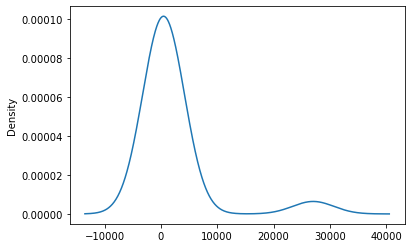

In [9]:
# Visualize the value counts
apptype_counts.plot.density()

In [10]:
# Determine which values to replace: those which appear less than 100 times
replace_apptype = list(apptype_counts[apptype_counts < 100].index)

# Replace in DataFrame
for apptype in replace_apptype:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(apptype,"Other")

# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Check AFFILIATION column values
charity_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [12]:
# Check CLASSIFICATION column values
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2150        1
C1283        1
C1728        1
C2561        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [13]:
# Check USE_CASE column values
charity_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [14]:
# Check ORGANIZATION column values
charity_df.ORGANIZATION.value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [15]:
# Check SPECIAL_CONSIDERATIONS column values
charity_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [16]:
# Check INCOME_AMT column values
charity_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [17]:
# Check for null values
charity_df.isnull().sum()

NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

## Encode categorical variables

In [18]:
# Create dummy variables for the categorical features using get_dummies
category_columns = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()
encoded_df = pd.get_dummies(charity_df, columns=category_columns)
encoded_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Split the data and standardize numerical variables

In [19]:
# Split our preprocessed data into our features and target arrays
y = encoded_df["IS_SUCCESSFUL"].values
X = encoded_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create binary classification model

In [21]:
len(X_train_scaled[0])

332

In [22]:
# Create a neural network model with keras
nn = tf.keras.models.Sequential()

# Add hidden layer with twice as many neurons as there are inputs
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  664
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# add an output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# print a summary of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 664)               221112    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 665       
Total params: 221,777
Trainable params: 221,777
Non-trainable params: 0
_________________________________________________________________


In [23]:
# compile the model using the "adam" optimizer and "mean_squared_error" loss function
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
# train the model for 100 epochs
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
25724/25724 [==============================] - 3s 134us/sample - loss: 0.4749 - acc: 0.7685
Epoch 2/100
25724/25724 [==============================] - 3s 120us/sample - loss: 0.4544 - acc: 0.7770
Epoch 3/100
25724/25724 [==============================] - 3s 120us/sample - loss: 0.4488 - acc: 0.7792
Epoch 4/100
25724/25724 [==============================] - 3s 121us/sample - loss: 0.4472 - acc: 0.7813
Epoch 5/100
25724/25724 [==============================] - 3s 119us/sample - loss: 0.4463 - acc: 0.7812
Epoch 6/100
25724/25724 [==============================] - 3s 121us/sample - loss: 0.4453 - acc: 0.7806
Epoch 7/100
25724/25724 [==============================] - 3s 119us/sample - loss: 0.4444 - acc: 0.7814
Epoch 8/100
25724/25724 [==============================] - 3s 119us/sample - loss: 0.4432 - acc: 0.7818
Epoch 9/100
25724/25724 [==============================] - 3s 120us/sample - loss: 0.4415 - acc: 0.7834
Epoch 10/100
25724/25724 [==============================] - 3s 1

25724/25724 [==============================] - 3s 120us/sample - loss: 0.4132 - acc: 0.7989
Epoch 80/100
25724/25724 [==============================] - 3s 119us/sample - loss: 0.4132 - acc: 0.7998
Epoch 81/100
25724/25724 [==============================] - 3s 119us/sample - loss: 0.4135 - acc: 0.7982
Epoch 82/100
25724/25724 [==============================] - 3s 121us/sample - loss: 0.4133 - acc: 0.7986
Epoch 83/100
25724/25724 [==============================] - 3s 120us/sample - loss: 0.4129 - acc: 0.8001
Epoch 84/100
25724/25724 [==============================] - 3s 119us/sample - loss: 0.4129 - acc: 0.8001
Epoch 85/100
25724/25724 [==============================] - 3s 120us/sample - loss: 0.4131 - acc: 0.7990
Epoch 86/100
25724/25724 [==============================] - 3s 123us/sample - loss: 0.4127 - acc: 0.7999
Epoch 87/100
25724/25724 [==============================] - 3s 119us/sample - loss: 0.4127 - acc: 0.7987
Epoch 88/100
25724/25724 [==============================] - 3s 121us

In [25]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 1s - loss: 0.4669 - acc: 0.7812
Loss: 0.4669290506874507, Accuracy: 0.7812244892120361


## Deep Learning

In [26]:
# create a deep learning model with two hidden layers
new_nn = tf.keras.models.Sequential()
number_input_features = len(X_train_scaled[0])
new_hidden_nodes_layer1 = 30
new_hidden_nodes_layer2 = 10

# add hidden layers
new_nn.add(tf.keras.layers.Dense(units=new_hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))
new_nn.add(tf.keras.layers.Dense(units=new_hidden_nodes_layer2, activation="sigmoid"))

# add an output layer
new_nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# print a summary of the model
new_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                9990      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 10,311
Trainable params: 10,311
Non-trainable params: 0
_________________________________________________________________


In [27]:
# compile the model
new_nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# train the model for 100 epochs
fit_model = new_nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
25724/25724 [==============================] - 3s 108us/sample - loss: 0.5295 - acc: 0.7582
Epoch 2/100
25724/25724 [==============================] - 2s 95us/sample - loss: 0.4560 - acc: 0.7834
Epoch 3/100
25724/25724 [==============================] - 3s 98us/sample - loss: 0.4490 - acc: 0.7834
Epoch 4/100
25724/25724 [==============================] - 2s 97us/sample - loss: 0.4458 - acc: 0.7817
Epoch 5/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.4436 - acc: 0.7841
Epoch 6/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.4417 - acc: 0.7845
Epoch 7/100
25724/25724 [==============================] - 2s 95us/sample - loss: 0.4411 - acc: 0.7837
Epoch 8/100
25724/25724 [==============================] - 2s 97us/sample - loss: 0.4398 - acc: 0.7840
Epoch 9/100
25724/25724 [==============================] - 2s 97us/sample - loss: 0.4389 - acc: 0.7870
Epoch 10/100
25724/25724 [==============================] - 2s 95us/samp

25724/25724 [==============================] - 2s 95us/sample - loss: 0.4142 - acc: 0.7994
Epoch 80/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.4141 - acc: 0.7996
Epoch 81/100
25724/25724 [==============================] - 2s 95us/sample - loss: 0.4136 - acc: 0.7989
Epoch 82/100
25724/25724 [==============================] - 2s 97us/sample - loss: 0.4137 - acc: 0.8002
Epoch 83/100
25724/25724 [==============================] - 3s 97us/sample - loss: 0.4136 - acc: 0.7995
Epoch 84/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.4135 - acc: 0.7995
Epoch 85/100
25724/25724 [==============================] - 2s 97us/sample - loss: 0.4136 - acc: 0.8006
Epoch 86/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.4134 - acc: 0.7999
Epoch 87/100
25724/25724 [==============================] - 2s 97us/sample - loss: 0.4134 - acc: 0.7994
Epoch 88/100
25724/25724 [==============================] - 3s 100us/sample -

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = new_nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.7969 - acc: 0.4668
Loss: 0.7968721917627851, Accuracy: 0.46682214736938477
